In [38]:
import pandas as pd
import joblib

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 카테고리형 변수들을 수치형으로 변경하는 함수 생성
from sklearn.preprocessing import LabelEncoder


def cat_encoding(df):
    le = LabelEncoder()
    original_columns = list(df.columns)
    
    for col in df:
        # df의 컬럼의 유형이 object인 것들만
        if df[col].dtype == 'object':
            
            # df의 컬럼별로 포함된 개체 수가 2개 이하이면 LabelEncoding
            if len(list(df[col].unique())) <= 2:
                le.fit(df[col])
                df[col] = le.transform(df[col])

            # df의 컬럼별로 포함된 개체 수가 3개 이상이면 ont-hot-encoding
            elif len(list(df[col].unique())) > 2:            
                df = pd.get_dummies(df, columns = [col], dummy_na=False)
    # 새롭게 만들어진 컬럼들의 이름을 리스트로 저장
    new_columns = [c for c in df.columns if c not in original_columns]
    
    # 수치형으로 변경된 df와 새롭게 만들어진 컬럼 이름 리스트를 반환
    return df, new_columns

In [3]:
# 파일 로드
bur_df = pd.read_csv('../../data/bureau.csv')
bb_df = pd.read_csv('../../data/bureau_balance.csv')

In [5]:
# bb_df 에 대한 결측값 확인
mis_val = bb_df.isnull().sum()
mis_val

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [6]:
# bureau_balance 파일에서 가져온 df의 category변수들을 수치형으로 변경
bb_df, bb_new_columns = cat_encoding(bb_df)

In [7]:
# months_balance 컬럼을 max와 size로 agg
bb_aggregations = {'MONTHS_BALANCE': ['max', 'size']}

In [8]:
# 새롭게 만들어진 컬럼들을 mean으로 agg
for col in bb_new_columns:
    bb_aggregations[col] = ['mean']

In [9]:
# SK_ID_BUREAU별로 groupby
bb_agg = bb_df.groupby('SK_ID_BUREAU').agg(bb_aggregations)

In [10]:
# 컬럼구분 및 이름 변경
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

In [11]:
bb_agg

,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN
SK_ID_BUREAU,,,,,,,,,,
5001709,0,97,0.000000,0.000000,0.0,0.0,0.0,0.0,0.886598,0.113402
5001710,0,83,0.060241,0.000000,0.0,0.0,0.0,0.0,0.578313,0.361446
5001711,0,4,0.750000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.250000
5001712,0,19,0.526316,0.000000,0.0,0.0,0.0,0.0,0.473684,0.000000
5001713,0,22,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
6842884,0,48,0.187500,0.000000,0.0,0.0,0.0,0.0,0.416667,0.395833
6842885,0,24,0.500000,0.000000,0.0,0.0,0.0,0.5,0.000000,0.000000
6842886,0,33,0.242424,0.000000,0.0,0.0,0.0,0.0,0.757576,0.000000


In [12]:
# bureau.csv 파일에서 가져온 df에 SK_ID_BUREAU기준으로 join
bur_df = bur_df.join(bb_agg, how='left', on='SK_ID_BUREAU')

In [13]:
# 더이상 필요하지 않은 SK_ID_BUREAU 컬럼 drop
bur_df.drop(['SK_ID_BUREAU'], axis=1, inplace= True)

In [14]:
bur_df

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,...,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN
0,215354,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716424,100044,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716425,100044,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716426,246829,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 결측값 확인
bur_df.isnull().sum()

SK_ID_CURR                      0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
MONTHS_BALANCE_MAX         942074
MONTHS_BALANCE_SIZE        942074
STATUS_0_MEAN              942074
STATUS_1_MEAN              942074
STATUS_2_MEAN              942074
STATUS_3_MEAN              942074
STATUS_4_MEAN              942074
STATUS_5_MEAN              942074
STATUS_C_MEAN              942074
STATUS_X_MEAN              942074
dtype: int64

In [16]:
# bur_df 또한 category변수들을 수치형으로 변환
bur_df, bur_new_columns = cat_encoding(bur_df)

In [17]:
# bur_df로 join 하며 생긴 결측값들 처리

bur_df['MONTHS_BALANCE_MAX'].fillna(0, inplace=True)
bur_df['MONTHS_BALANCE_SIZE'].fillna(0, inplace=True)

bur_df['STATUS_0_MEAN'].fillna(bur_df['STATUS_0_MEAN'].mean(), inplace=True)
bur_df['STATUS_1_MEAN'].fillna(bur_df['STATUS_1_MEAN'].mean(), inplace=True)
bur_df['STATUS_2_MEAN'].fillna(bur_df['STATUS_2_MEAN'].mean(), inplace=True)
bur_df['STATUS_3_MEAN'].fillna(bur_df['STATUS_3_MEAN'].mean(), inplace=True)
bur_df['STATUS_4_MEAN'].fillna(bur_df['STATUS_4_MEAN'].mean(), inplace=True)
bur_df['STATUS_5_MEAN'].fillna(bur_df['STATUS_5_MEAN'].mean(), inplace=True)
bur_df['STATUS_C_MEAN'].fillna(bur_df['STATUS_C_MEAN'].mean(), inplace=True)
bur_df['STATUS_X_MEAN'].fillna(bur_df['STATUS_X_MEAN'].mean(), inplace=True)

In [18]:
# 결측값이 50%가 넘어가는 변수들은 제외
bur_df.drop(['AMT_CREDIT_MAX_OVERDUE'], axis=1, inplace= True)
bur_df.drop(['AMT_ANNUITY'], axis=1, inplace= True)

In [19]:
bur_df

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,-497,0,-153.0,-153.0,0,91323.00,0.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,-208,0,1075.0,NaN,0,225000.00,171342.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,-203,0,528.0,NaN,0,464323.50,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
3,215354,-203,0,NaN,NaN,0,90000.00,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
4,215354,-629,0,1197.0,NaN,0,2700000.00,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,-44,0,-30.0,NaN,0,11250.00,11250.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1716424,100044,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,-1809,0,-1628.0,-970.0,0,15570.00,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,-1878,0,-1513.0,-1513.0,0,36000.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# 결측값을 채우기 위해 변수들의 특징 파악
bur_df['DAYS_CREDIT_ENDDATE'].describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

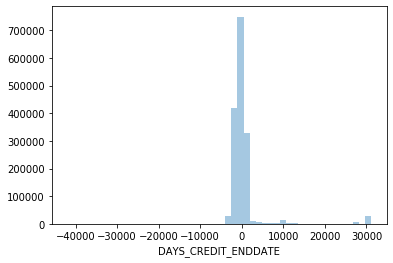

In [22]:
# 변수 특징 파악을 위한 시각화
sns.distplot(bur_df['DAYS_CREDIT_ENDDATE'], bins = 50, kde=False)
plt.show()

In [24]:
# 수치형 변수들에 대해 agg 조건 생성
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['max', 'mean'],
    'DAYS_ENDDATE_FACT': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_LIMIT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean','sum'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'MONTHS_BALANCE_MAX': ['max', 'mean'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']
}

# category형에서 수치형으로 변환된 변수들에 대해 agg 조건 생성
cat_aggregations = {}

for cat in bb_new_columns: cat_aggregations[cat + "_MEAN"] = ['mean']
for cat in bur_new_columns: cat_aggregations[cat] = ['mean']
    
cat_aggregations

{'STATUS_0_MEAN': ['mean'],
 'STATUS_1_MEAN': ['mean'],
 'STATUS_2_MEAN': ['mean'],
 'STATUS_3_MEAN': ['mean'],
 'STATUS_4_MEAN': ['mean'],
 'STATUS_5_MEAN': ['mean'],
 'STATUS_C_MEAN': ['mean'],
 'STATUS_X_MEAN': ['mean'],
 'CREDIT_ACTIVE_Active': ['mean'],
 'CREDIT_ACTIVE_Bad debt': ['mean'],
 'CREDIT_ACTIVE_Closed': ['mean'],
 'CREDIT_ACTIVE_Sold': ['mean'],
 'CREDIT_CURRENCY_currency 1': ['mean'],
 'CREDIT_CURRENCY_currency 2': ['mean'],
 'CREDIT_CURRENCY_currency 3': ['mean'],
 'CREDIT_CURRENCY_currency 4': ['mean'],
 'CREDIT_TYPE_Another type of loan': ['mean'],
 'CREDIT_TYPE_Car loan': ['mean'],
 'CREDIT_TYPE_Cash loan (non-earmarked)': ['mean'],
 'CREDIT_TYPE_Consumer credit': ['mean'],
 'CREDIT_TYPE_Credit card': ['mean'],
 'CREDIT_TYPE_Interbank credit': ['mean'],
 'CREDIT_TYPE_Loan for business development': ['mean'],
 'CREDIT_TYPE_Loan for purchase of shares (margin lending)': ['mean'],
 'CREDIT_TYPE_Loan for the purchase of equipment': ['mean'],
 'CREDIT_TYPE_Loan for work

In [25]:
# 위에서 생성한 agg 조건에 대해 SK_ID_CURR을 기준으로 groupby 
bureau_agg = bur_df.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})

In [26]:
bureau_agg

DAYS_CREDIT                                   CREDIT_DAY_OVERDUE  \
                   min   max         mean            var                min   
SK_ID_CURR                                                                    
100001           -1572   -49  -735.000000  240043.666667                  0   
100002           -1437  -103  -874.000000  186150.000000                  0   
100003           -2586  -606 -1400.750000  827783.583333                  0   
100004           -1326  -408  -867.000000  421362.000000                  0   
100005            -373   -62  -190.666667   26340.333333                  0   
...                ...   ...          ...            ...                ...   
456249           -2713  -483 -1667.076923  407302.243590                  0   
456250           -1002  -760  -862.000000   15724.000000                  0   
456253            -919  -713  -867.500000   10609.000000                  0   
456254           -1104 -1104 -1104.000000            NaN                  0   
456255           -2337  -363 -1089.454545  502786.672727                  0   

                    DAYS_CREDIT_ENDDATE              DAYS_ENDDATE_FACT  ...  \
           max mean                 max         mean               max  ...   
SK_ID_CURR                                                              ...   
100001       0  0.0              1778.0    82.428571            -544.0  ...   
100002       0  0.0               780.0  -349.000000             -36.0  ...   
100003       0  0.0              1216.0  -544.500000            -540.0  ...   
100004       0  0.0              -382.0  -488.500000            -382.0  ...   
100005       0  0.0              1324.0   439.333333            -123.0  ...   
...         ..  ...                 ...          ...               ...  ...   
456249       0  0.0              1363.0 -1232.333333            -291.0  ...   
456250       0  0.0              2340.0  1288.333333            -760.0  ...   
456253       0  0.0              1113.0   280.500000            -794.0  ...   
456254       0  0.0              -859.0  -859.000000            -859.0  ...   
456255       0  0.0             27320.0  3231.272727            -712.0  ...   

           CREDIT_TYPE_Interbank credit  \
                                   mean   
SK_ID_CURR                                
100001                              0.0   
100002                              0.0   
100003                              0.0   
100004                              0.0   
100005                              0.0   
...                                 ...   
456249                              0.0   
456250                              0.0   
456253                              0.0   
456254                              0.0   
456255                              0.0   

           CREDIT_TYPE_Loan for business development  \
                                                mean   
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   
...                                              ...   
456249                                           0.0   
456250                                           0.0   
456253                                           0.0   
456254                                           0.0   
456255                                           0.0   

           CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
                                                               mean   
SK_ID_CURR                                                            
100001                                                    0.0         
100002                                                    0.0         
100003                                                

In [27]:
# 변수명 정리
bureau_agg.columns = pd.Index(['BUR_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

In [28]:
bureau_agg

,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_CREDIT_DAY_OVERDUE_MIN,BUR_CREDIT_DAY_OVERDUE_MAX,BUR_CREDIT_DAY_OVERDUE_MEAN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_DAYS_ENDDATE_FACT_MAX,...,BUR_CREDIT_TYPE_Interbank credit_MEAN,BUR_CREDIT_TYPE_Loan for business development_MEAN,BUR_CREDIT_TYPE_Loan for purchase of shares (margin lending)_MEAN,BUR_CREDIT_TYPE_Loan for the purchase of equipment_MEAN,BUR_CREDIT_TYPE_Loan for working capital replenishment_MEAN,BUR_CREDIT_TYPE_Microloan_MEAN,BUR_CREDIT_TYPE_Mobile operator loan_MEAN,BUR_CREDIT_TYPE_Mortgage_MEAN,BUR_CREDIT_TYPE_Real estate loan_MEAN,BUR_CREDIT_TYPE_Unknown type of loan_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,0,0,0.0,1778.0,82.428571,-544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,-1437,-103,-874.000000,186150.000000,0,0,0.0,780.0,-349.000000,-36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,-2586,-606,-1400.750000,827783.583333,0,0,0.0,1216.0,-544.500000,-540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,-1326,-408,-867.000000,421362.000000,0,0,0.0,-382.0,-488.500000,-382.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,-373,-62,-190.666667,26340.333333,0,0,0.0,1324.0,439.333333,-123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,-2713,-483,-1667.076923,407302.243590,0,0,0.0,1363.0,-1232.333333,-291.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456250,-1002,-760,-862.000000,15724.000000,0,0,0.0,2340.0,1288.333333,-760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456253,-919,-713,-867.500000,10609.000000,0,0,0.0,1113.0,280.500000,-794.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# 결측값 확인
bureau_agg.isnull().sum().sort_values(ascending=False)

BUR_DAYS_CREDIT_VAR                                                  41520
BUR_DAYS_ENDDATE_FACT_MEAN                                           37656
BUR_DAYS_ENDDATE_FACT_MAX                                            37656
BUR_AMT_CREDIT_SUM_LIMIT_MEAN                                        25308
BUR_AMT_CREDIT_SUM_LIMIT_MAX                                         25308
BUR_AMT_CREDIT_SUM_DEBT_MEAN                                          8372
BUR_AMT_CREDIT_SUM_DEBT_MAX                                           8372
BUR_DAYS_CREDIT_ENDDATE_MAX                                           2585
BUR_DAYS_CREDIT_ENDDATE_MEAN                                          2585
BUR_AMT_CREDIT_SUM_MAX                                                   2
BUR_AMT_CREDIT_SUM_MEAN                                                  2
BUR_AMT_CREDIT_SUM_OVERDUE_SUM                                           0
BUR_DAYS_CREDIT_UPDATE_MEAN                                              0
BUR_MONTHS_BALANCE_MAX_MA

In [31]:
# 결측값을 채우기 위해 변수들의 특징 파악
bureau_agg['BUR_DAYS_CREDIT_ENDDATE_MAX'].describe()

count    303226.000000
mean       4508.643464
std        9422.717152
min      -41875.000000
25%         126.000000
50%         912.000000
75%        1692.000000
max       31199.000000
Name: BUR_DAYS_CREDIT_ENDDATE_MAX, dtype: float64

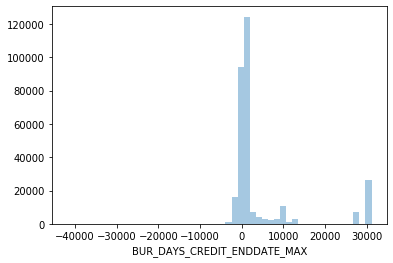

In [32]:
sns.distplot(bureau_agg['BUR_DAYS_CREDIT_ENDDATE_MAX'], bins = 50, kde=False)

In [33]:
bureau_agg['BUR_DAYS_CREDIT_ENDDATE_MAX'].median()

912.0

In [34]:
bureau_agg['BUR_DAYS_CREDIT_ENDDATE_MAX'].mode()

0    31060.0
dtype: float64

In [35]:
# 결측값 처리
ls = ['BUR_DAYS_CREDIT_ENDDATE_MAX', 'BUR_DAYS_CREDIT_ENDDATE_MEAN', 'BUR_DAYS_ENDDATE_FACT_MAX',
     'BUR_DAYS_ENDDATE_FACT_MEAN', 'BUR_AMT_CREDIT_SUM_MAX', 'BUR_AMT_CREDIT_SUM_MEAN',
     'BUR_AMT_CREDIT_SUM_DEBT_MAX', 'BUR_AMT_CREDIT_SUM_DEBT_MEAN', 'BUR_AMT_CREDIT_SUM_LIMIT_MAX',
     'BUR_AMT_CREDIT_SUM_LIMIT_MEAN']
for i in ls:
    bureau_agg[i].fillna(bureau_agg[i].mean(), inplace=True)
    
bureau_agg['BUR_DAYS_CREDIT_VAR'].fillna(0, inplace=True)

In [39]:
# joblib 파일로 저장
joblib.dump(filename= "bureau_df_fillna.joblib", value=bureau_agg)

['bureau_df_fillna.joblib']